In [1]:
library(rethinking)
rstan_options(auto_write = TRUE)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [2]:
123

[1] 123

In [3]:
data(foxes)

head(foxes)

group,avgfood,groupsize,area,weight
1,0.37,2,1.09,5.02
1,0.37,2,1.09,2.84
2,0.53,2,2.05,5.33
2,0.53,2,2.05,6.07
3,0.49,2,2.12,5.85
3,0.49,2,2.12,3.25


In [5]:
m5H1.1 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b1*area ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = foxes
)

In file included from /opt/conda/lib/R/library/BH/include/boost/config.hpp:39:0,
                 from /opt/conda/lib/R/library/BH/include/boost/math/tools/config.hpp:13,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math.hpp:4,
                 from /opt/conda/lib/R/library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file2c5dccab0e.cpp:8:
/opt/conda/lib/R/library/BH/include/boost/config/compiler/gcc.hpp:186:0: warning: "BOOST_NO_CXX11_RVALUE_REFERENCES" redefined
 #  define BOOST_NO_CXX11_RVALUE_REFERENCES
 ^
<command-line>:0:0: note: this is t

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Computing WAIC
Constructing posterior predictions


[ 1000 / 1000 ]


In [6]:
m5H1.2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a2 + b2*groupsize ,
    a2 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = foxes
)

[ 1000 / 1000 ]


Warning message in abline(m5H1.1):
“only using the first two of 3 regression coefficients”

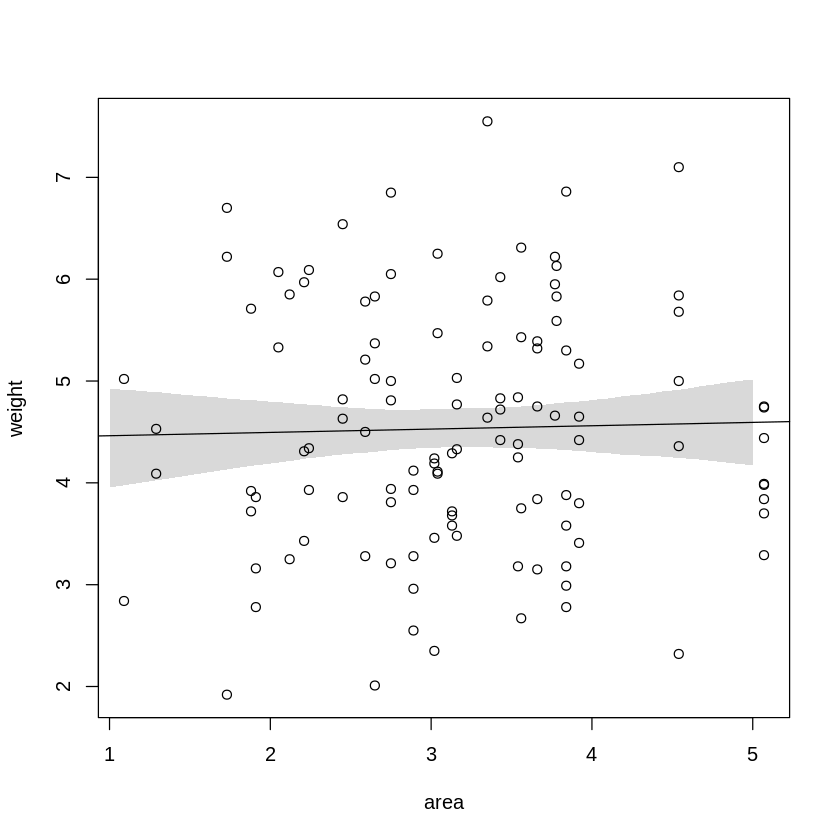

In [7]:
m5h11.seq <- seq(from = 1, to = 5, length.out = 50)
mu <- link(m5H1.1, data = data.frame(area = m5h11.seq))
mu.PI <- apply(mu, 2, PI)

plot(weight ~ area, data = foxes)
abline(m5H1.1)
shade(mu.PI, m5h11.seq)


[ 1000 / 1000 ]


Warning message in abline(m5H1.2):
“only using the first two of 3 regression coefficients”

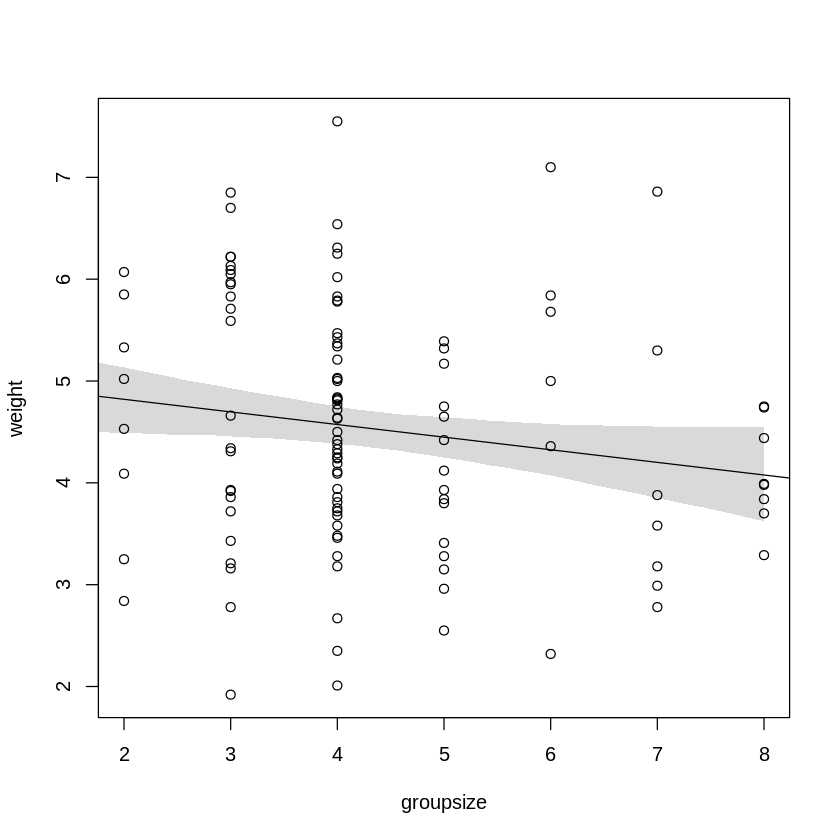

In [8]:
m5h12.seq <- seq(from = 1, to = 8, length.out = 50)
mu <- link(m5H1.2, data = data.frame(groupsize = m5h12.seq))
mu.PI <- apply(mu, 2, PI)

plot(weight ~ groupsize, data = foxes)
abline(m5H1.2)
shade(mu.PI, m5h12.seq)


In [ ]:
m5h2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a*area + b_gs* groupsize,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,1)
  ),
  data = foxes
)

In [28]:
A.avg <- mean(foxes$area)
R.seq <- seq(from = 0, to = 8, length.out = 30)
pred.data <- data.frame(groupsize = R.seq, area = A.avg )

mu <- link(m5h2, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

R.sim <- sim(m5h2, data = pred.data, n = 1e4)

R.PI <- apply(R.sim, 2, PI)

plot(weight ~ groupsize, data = foxes, type = "n")

lines(R.seq, mu.mean)
mtext("area = A.avg")

shade(mu.PI, R.seq)
shade(R.PI, R.seq)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning message in rnorm(30, mu, sigma):
“NAs produced”Warning me

ERROR: Error in quantile.default(samples, probs = c(a, 1 - a)): missing values and NaN's not allowed if 'na.rm' is FALSE


In [ ]:
A.avg <- mean(foxes$groupsize)
R.seq <- seq(from = 0, to = 6, length.out = 30)
pred.data <- data.frame(area = R.seq, groupsize = A.avg )

mu <- link(m5h2, data = pred.data)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

R.sim <- sim(m5h2, data = pred.data, n = 1e4)

R.PI <- apply(R.sim, 2, PI)

plot(weight ~ area, data = foxes, type = "n")

lines(R.seq, mu.mean)
mtext("groupsize.s = A.avg")


shade(mu.PI, R.seq)
shade(R.PI, R.seq)

In [ ]:
m5h3.1 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_gs * groupsize + b_f * avgfood,
    a ~ dnorm(5,10),
    b_f ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

In [ ]:
m5h3.2 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a * area + b_gs * groupsize + b_f * avgfood,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_f ~ dnorm(0,1),
    b_gs ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

In [21]:
m5h3.3 <- map(
  alist (
    weight ~ dnorm(mu, sigma),
    mu <- a + b_a * area + b_f * avgfood,
    a ~ dnorm(5,10),
    b_a ~ dnorm(0,1),
    b_f ~ dnorm(0,1),
    sigma ~ dnorm(0,10)
  ),
  data = foxes
)

In [22]:
plot(precis(m5h3.2))

ERROR: Error in precis(m5h3.2): object 'm5h3.2' not found


In [23]:
plot(precis(m5h3.2))

ERROR: Error in precis(m5h3.2): object 'm5h3.2' not found


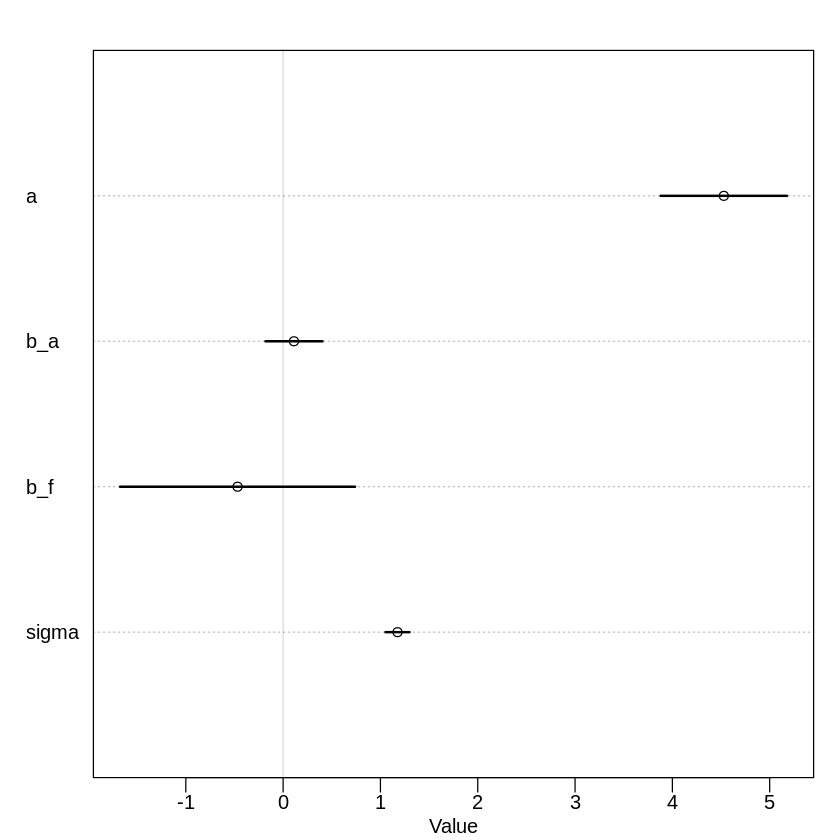

In [24]:
plot(precis(m5h3.3))

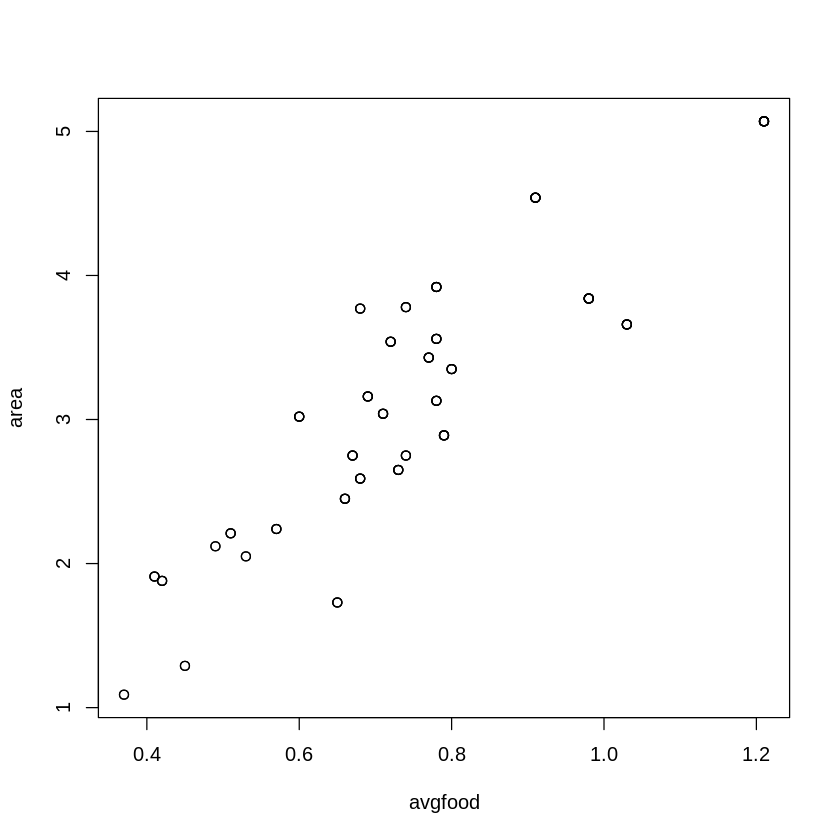

In [25]:
plot(area ~ avgfood, data = foxes)

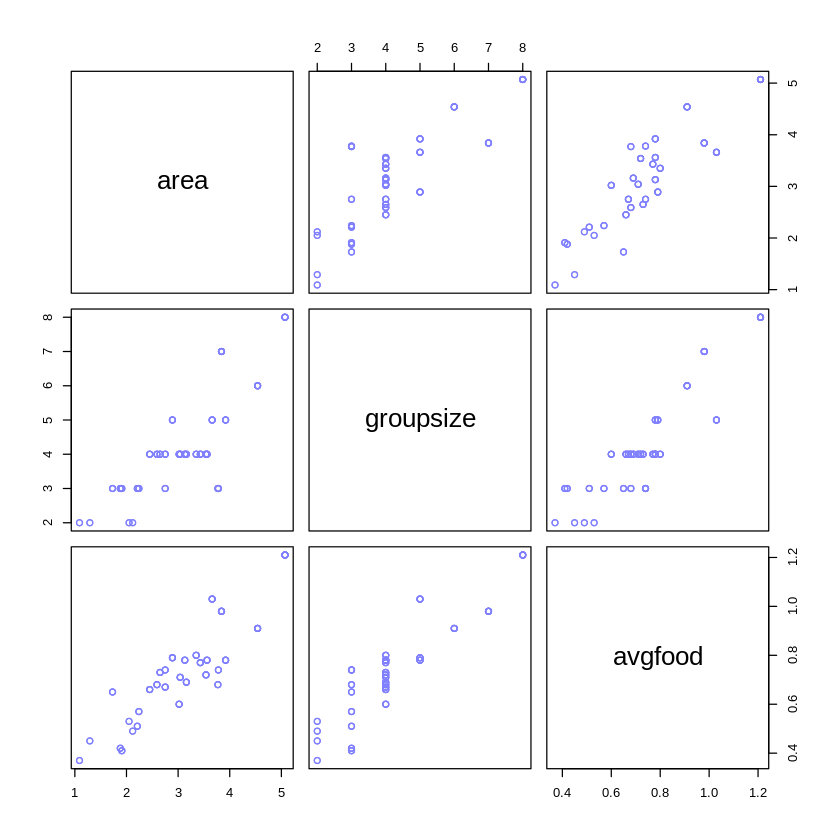

In [17]:
pairs(~ area + groupsize + avgfood, data = foxes, col = rangi2)

In [18]:
cor(foxes$area, foxes$groupsize)

[1] 0.8275945

In [19]:
cor(foxes$area, foxes$avgfood)

[1] 0.8831038

In [20]:
cor(foxes$groupsize, foxes$avgfood)

[1] 0.9014829

In [29]:
stancode(m5h3.3)

data{
    int<lower=1> N;
    real weight[N];
    real avgfood[N];
    real area[N];
}
parameters{
    real a;
    real b_a;
    real b_f;
    real<lower=0> sigma;
}
model{
    vector[N] mu;
    sigma ~ normal( 0 , 10 );
    b_f ~ normal( 0 , 1 );
    b_a ~ normal( 0 , 1 );
    a ~ normal( 5 , 10 );
    for ( i in 1:N ) {
        mu[i] = a + b_a * area[i] + b_f * avgfood[i];
    }
    weight ~ normal( mu , sigma );
}
generated quantities{
    vector[N] mu;
    real dev;
    dev = 0;
    for ( i in 1:N ) {
        mu[i] = a + b_a * area[i] + b_f * avgfood[i];
    }
    dev = dev + (-2)*normal_lpdf( weight | mu , sigma );
}
